# Alguns conceitos de estatística, part III

 ## 1. Distribuição de Poisson
   - Mede a probabilidade de um evento ocorrer em intervalos de tempo, por exemplo: as chances de acidentes de carro em um dia
   - Os eventos a cada intervalo de tempo devem ser independentes entre si
   - Eventos:
     - P(X = x), exemplo: as chances de ocorrer 3 acidentes de carro no dia
     - P(X < x), exemplo: as chances de ocorrer menos de 3 acidentes no dia
     - P(X > x), exemplo: as chances de ocorrer mais de 3 acidentes no dia
   - Para o calculo é necessario:
     - O número de eventos que estão sendo calculados
     - O número médio de de ocorrência do evento no intervalo de tempo

In [4]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot  as plt
from scipy import stats
from scipy.stats import poisson
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from pyod.models.knn import KNN

In [5]:
# Média de acidentes de carro é 2 por dia
# Qual a probabilidade de ocorrer 3 acidentes por dia?
poisson.pmf(3,2)

0.18044704431548356

In [6]:
# Qual a probabilidade de ocorrer 3 acidentes ou menos por dia?
poisson.cdf(3,2)

0.857123460498547

In [7]:
# Qual a probabilidade de ocorrer 3 acidentes ou mais por dia?
poisson.sf(3,2)

0.14287653950145296

 ## 2. Qui quadrado
  - Serve para a provar hipóteses

In [8]:
novela = numpy.array([[19,6],[43,32]])
chi2_contingency(novela)

(2.037351443123939, 0.15347667161786666, 1, array([[15.5,  9.5],
        [46.5, 28.5]]))

 ## 3. Test T de Student
 
  - Usado para fazer teste de hipóteses
  - Compara duas médias
  - Pré-requisitos:
    - As duas amostrar são independentes
    - Variável dependente normalmente distribuída
    - Variância entre duas variáveis é aproximada
  - Útil para comparar duas amostras
  
## 4. Análise de variância( Anova ):
 
  - Usado para teste de hipóteses
  - Usado para comparar 3 grupos ou mais
  - Uma variável quantitativa e uma ou mais variávei categóricas
  - Compara todo o conjunto, não em pares
  - Test F
    - x -> grau de liberdade: numero de grupos - 1
    - y -> grau de liberdade no denominador: numero de observações - numero de grupos
    - hipótese nula: não há variância significativa entre os grupos
    - valor - p < alfa: há variação significativa entre os grupos
  - Test de tukey: tendo em vista que a hipotese alternativa foi provada, esse teste tem o intuito de mostra onde está a variância

In [9]:
tratamento = pandas.read_csv("data/anova.csv", sep=";")
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


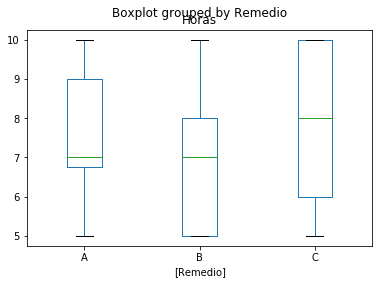

In [10]:
tratamento.boxplot(by = 'Remedio', grid=False)

In [12]:
modelo1 = ols("Horas ~ Remedio", data=tratamento).fit()
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [13]:
modelo2 = ols("Horas ~ Remedio * Sexo", data=tratamento).fit()
resultado2 = sm.stats.anova_lm(modelo2)
resultado2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


In [15]:
mc = MultiComparison(tratamento["Horas"], tratamento["Remedio"])
resultado = mc.tukeyhsd()
print (resultado)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  A      B     -0.625  -3.0803 1.8303 False 
  A      C     0.375   -2.0803 2.8303 False 
  B      C      1.0    -1.4553 3.4553 False 
--------------------------------------------
